In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [3]:
#importing the datasets we're going to work with

ansur_df_female = pd.read_csv('data/ansur_2_female_2.csv')  #ansur female dataset

non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class', 'abdominalextensiondepthsitting', 'Unnamed: 25']
ansur_df_female_numeric = ansur_df_female.drop(non_numeric, axis = 1)     #droping non-numerical columns in the dataset
ansur_df_female_numeric

,acromialheight,acromionradialelength,anklecircumference,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560
1,194,1379,320,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665
2,183,1369,329,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711
3,261,1356,306,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660
4,309,1303,308,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,285,1392,335,155,749,446,136,872,1706,447,334,1043,265,370,1002,162,836,83.2,1.687
1982,262,1324,301,157,721,422,131,838,1648,446,334,971,243,374,958,157,804,71.7,1.613
1983,260,1334,318,159,758,449,127,862,1590,444,335,982,254,351,970,159,774,76.2,1.644
1984,205,1293,302,163,725,419,135,802,1525,450,298,837,208,335,952,146,769,63.2,1.616


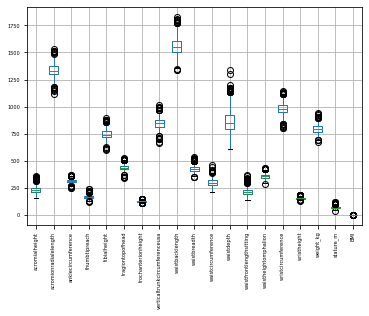

In [4]:
# Creating a boxplot (a method for graphically depicting groups of numerical data through their quartiles)

ansur_df_female_numeric.boxplot(fontsize=5, rot=90)

plt.show()

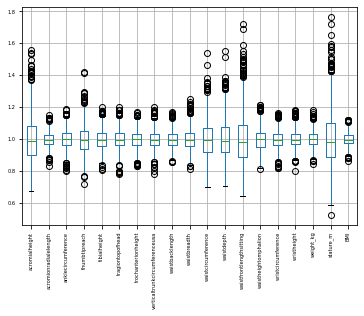

acromialheight                   0.018772
acromionradialelength            0.001892
anklecircumference               0.003042
thumbtipreach                    0.007014
tibialheight                     0.003302
tragiontopofhead                 0.003273
trochanterionheight              0.002682
verticaltrunkcircumferenceusa    0.002793
waistbacklength                  0.002374
waistbreadth                     0.003848
waistcircumference               0.012079
waistdepth                       0.013474
waistfrontlengthsitting          0.021690
waistheightomphalion             0.004546
wristcircumference               0.002605
wristheight                      0.002557
weight_kg                        0.002313
stature_m                        0.026281
BMI                              0.001554
dtype: float64


In [5]:
# Normalizing the data
normalized_df = ansur_df_female_numeric / ansur_df_female_numeric.mean()

normalized_df.boxplot(fontsize=5, rot=90)
plt.show()

print(normalized_df.var()) #printing the variance of each feature

In [6]:
# Create a VarianceThreshold feature selector and fitting it to the normalized df
VarSelector = VarianceThreshold(threshold=0.01)
VarSelector.fit(ansur_df_female_numeric / ansur_df_female_numeric.mean())

#Generating a boolean mask and passing it with the .loc methode
mask = VarSelector.get_support()
reduced_df = ansur_df_female_numeric.loc[:, mask]

print("Dimensionality before : {} columns \nDimensionality after : {} columns".format(ansur_df_female_numeric.shape[1], reduced_df.shape[1]))

Dimensionality before : 19 columns 
Dimensionality after : 5 columns


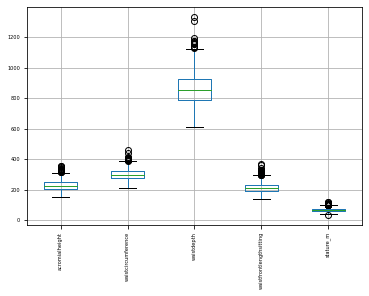

In [8]:
reduced_df.boxplot(fontsize=5, rot=90)
plt.show()